# Image Transformations Lab
All  of  the  programming  assignments  are  to  be  done  in  Python  using  additional  libraries  specified  in  the  assignments.  There  are many  libraries  available,  some  of  which  we  will  be  using,  and  you  are  welcome  to  use  them  with  one  exception:  if  the  library  or  a  function  within  it  performs  the  specific  function  you  are  asked  to  code,  you  may  not  use  that  other  than  perhaps  as  a  reference  to  compare  against. All  of  the  code  you  submit  must  be  your  own. You are welcome to turn in a completed jupyter notebook.

The following code will load an image you can use for this lab. If needed make sure to install PIL using *pip install PIL* or *conda install PIL*.

**Note:** On the homework, the direction of the positve Y-axis was up. In this lab (and most image packages), the direction of the positive Y-axis is down. This means that you will need to rotate in the opposite direction of what you did on the homework.

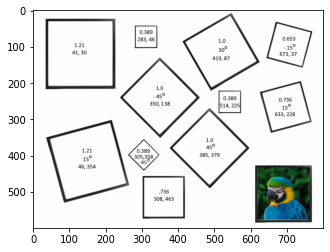

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# %matplotlib notebook
%matplotlib inline

def compose(frame, image, transformation):
    
    width, height = frame.size
    
    #Invert matrix for compose function, grab values for Affine Transform
    t = np.linalg.inv(transformation)
    a=t[0,0]; b=t[0,1]; c=t[0,2]; d=t[1,0]; e=t[1,1]; f=t[1,2]
    
    image = image.transform((width,height), Image.AFFINE,(a,b,c,d,e,f), Image.BICUBIC)

    #Make mask from image's location
    im = np.sum(np.asarray(image), -1)
    vals = 255.0*( im > 0)
    mask = Image.fromarray(vals).convert("1")

    #Composite images together
    result = Image.composite(image,frame,mask)

    return result


#Open the two images
filename = "PictureFrameCollage.png"
frame = Image.open(filename).convert("RGB")

filename0 = "Bird0.png"
im = Image.open(filename0).convert("RGB")

#Define the transformation to the first picture frame
transformation = np.matrix([[1,0,619],[0,1,433],[0,0,1]])

#Compose the two images together
result = compose(frame, im, transformation)
    
#Show the result
plt.imshow(result)
plt.show()

#Uncomment this line if you want to save the image
#result.save("Output.png")

Tip: Make sure you are comfortable with building your own transformations and how the compositing code works, then try implementing your own general transform function.

In [14]:
def transform2(frame, image, direction, theta, scale, x, y):
  #Set scale matrix
  scaleMatrix = np.matrix([[scale,0,0],[0,scale,0],[0,0,1]])

  #Counterclockwise rotation
  if direction == 0:
    rotationMatrix = np.matrix([[np.cos(theta),np.sin(theta),0],[-np.sin(theta), np.cos(theta), 0],[0,0,1]])
  #Clockwise rotation
  else:
    rotationMatrix = np.matrix([[np.cos(theta),-np.sin(theta),0],[np.sin(theta), np.cos(theta), 0],[0,0,1]])

  #Set translation matrix
  translationMatrix = np.matrix([[1,0,x],[0,1,y],[0,0,1]])

  #Combine into transformation matrix
  transformation = np.matmul(np.matmul(np.linalg.inv(scaleMatrix),np.linalg.inv(rotationMatrix)),np.linalg.inv(translationMatrix))

  return compose(frame, image, np.linalg.inv(transformation))


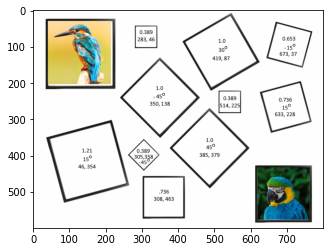

In [15]:
#Open bird1
filename0 = "Bird1.png"
im = Image.open(filename0).convert("RGB")

#Define the rotation, scale and translation for the next picture frame
direction = 0
rotation = 0
scale = 1.21
x =41
y =30

#Compose the two images together
result2 = transform2(result, im, direction, rotation, scale, x, y)
    
#Show the result
plt.imshow(result2)
plt.show()

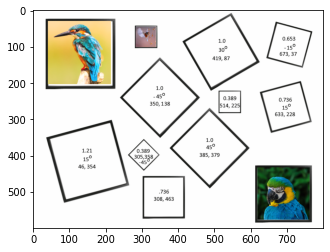

In [16]:
#Open bird2
filename0 = "Bird2.png"
im = Image.open(filename0).convert("RGB")

#Define the rotation, scale and translation for the next picture frame
direction = 0
rotation = 0
scale = 0.389
x = 283
y = 46

#Compose the two images together
result3 = transform2(result2, im, direction, rotation, scale, x, y)
    
#Show the result
plt.imshow(result3)
plt.show()

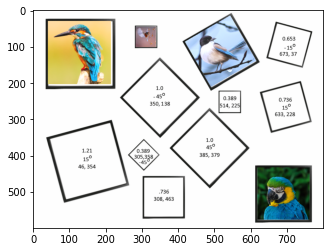

In [18]:
#Open bird3
filename0 = "Bird3.png"
im = Image.open(filename0).convert("RGB")

#Define the rotation, scale and translation for the next picture frame
direction = 0
rotation = np.pi/6.0
scale = 1
x = 419
y = 87

#Compose the two images together
result4 = transform2(result3, im, direction, rotation, scale, x, y)
    
#Show the result
plt.imshow(result4)
plt.show()

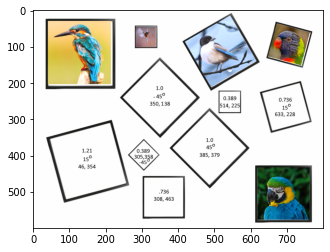

In [19]:
#Open bird4
filename0 = "Bird4.png"
im = Image.open(filename0).convert("RGB")

#Define the rotation, scale and translation for the next picture frame
direction = 1
rotation = np.pi/12.0
scale = 0.653
x = 673
y = 37

#Compose the two images together
result5 = transform2(result4, im, direction, rotation, scale, x, y)
    
#Show the result
plt.imshow(result5)
plt.show()

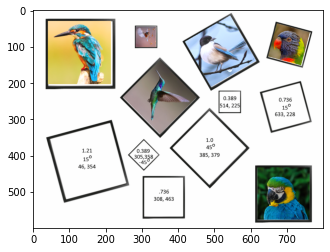

In [21]:
#Open bird5
filename0 = "Bird5.png"
im = Image.open(filename0).convert("RGB")

#Define the rotation, scale and translation for the next picture frame
direction = 1
rotation = np.pi/4.0
scale = 1
x = 350
y = 138

#Compose the two images together
result6 = transform2(result5, im, direction, rotation, scale, x, y)
    
#Show the result
plt.imshow(result6)
plt.show()

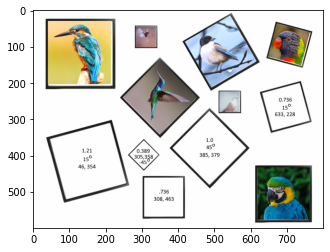

In [22]:
#Open bird6
filename0 = "Bird6.png"
im = Image.open(filename0).convert("RGB")

#Define the rotation, scale and translation for the next picture frame
direction = 1
rotation = 0
scale = 0.389
x = 514
y = 225

#Compose the two images together
result7 = transform2(result6, im, direction, rotation, scale, x, y)
    
#Show the result
plt.imshow(result7)
plt.show()

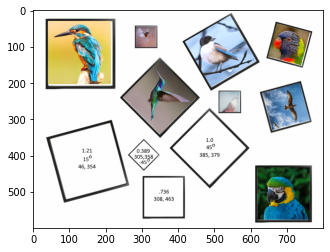

In [23]:
#Open bird7
filename0 = "Bird7.png"
im = Image.open(filename0).convert("RGB")

#Define the rotation, scale and translation for the next picture frame
direction = 0
rotation = np.pi/12.0
scale = 0.736
x = 633
y = 228

#Compose the two images together
result8 = transform2(result7, im, direction, rotation, scale, x, y)
    
#Show the result
plt.imshow(result8)
plt.show()

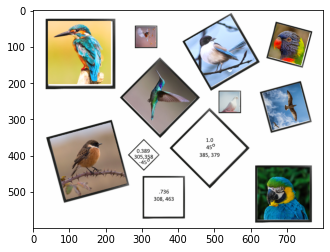

In [24]:
#Open bird8
filename0 = "Bird8.png"
im = Image.open(filename0).convert("RGB")

#Define the rotation, scale and translation for the next picture frame
direction = 0
rotation = np.pi/12.0
scale = 1.21
x = 46
y = 354

#Compose the two images together
result9 = transform2(result8, im, direction, rotation, scale, x, y)
    
#Show the result
plt.imshow(result9)
plt.show()

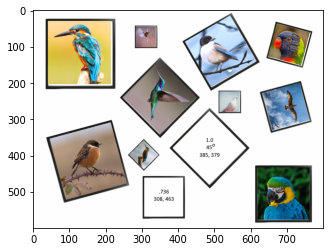

In [25]:
#Open bird9
filename0 = "Bird9.png"
im = Image.open(filename0).convert("RGB")

#Define the rotation, scale and translation for the next picture frame
direction = 1
rotation = np.pi/4.0
scale = 0.389
x = 305
y = 358

#Compose the two images together
result10 = transform2(result9, im, direction, rotation, scale, x, y)
    
#Show the result
plt.imshow(result10)
plt.show()

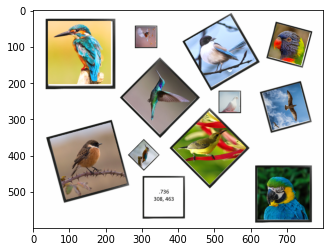

In [26]:
#Open bird10
filename0 = "Bird10.png"
im = Image.open(filename0).convert("RGB")

#Define the rotation, scale and translation for the next picture frame
direction = 0
rotation = np.pi/4.0
scale = 1
x = 385
y = 379

#Compose the two images together
result11 = transform2(result10, im, direction, rotation, scale, x, y)
    
#Show the result
plt.imshow(result11)
plt.show()

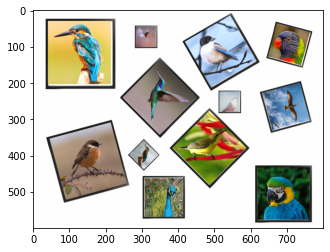

In [28]:
#Open bird11
filename0 = "Bird11.png"
im = Image.open(filename0).convert("RGB")

#Define the rotation, scale and translation for the next picture frame
direction = 0
rotation = 0
scale = 0.736
x = 308
y = 463

#Compose the two images together
result12 = transform2(result11, im, direction, rotation, scale, x, y)
    
#Show the result
plt.imshow(result12)
plt.show()

result12.save("Output.png")